In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
import copy

import sys
sys.path.append('/Users/clementinechazal/Documents/these/kernel_path')
import functions as fc

In [13]:
n = 300
d = 2

Mu = [-10*np.ones(2), 10*np.ones(2)]
Sigma = [np.identity(2), np.identity(2)]
p = [1/2, 1/2]

# Mu = [-5*np.ones(2), 5*np.ones(2),np.array([-5,5]),np.array([5,-5])]
# Sigma = [np.identity(2), np.identity(2),np.identity(2),np.identity(2)]
# p = [1/4, 1/4,1/4,1/4]

X1 =fc.mixt_gauss(Mu, Sigma, n, p)
# mask = (X1[:, 0] > 1) & (X1[:, 1] > 1)
# mask_inv = ~mask

# Mu = [ 3* np.ones(2)]
# Sigma = [np.identity(d)]
# p = [1]
# X1 =fc.mixt_gauss(Mu, Sigma, n, p) # Samples from the target distribution pi_1, a mixture of 2 gaussians

In [14]:
sigma = 2
k = lambda x,y : fc.k_gauss(x,y,sigma)
dk = lambda x,y : fc.dk_gauss(x,y,sigma)
ddk = lambda x,y : fc.ddk_gauss(x,y,sigma)

# k = lambda x,y : fc.k_linear(x,y)
# dk = lambda x,y : fc.dk_linear(x,y)
# ddk = lambda x,y : fc.ddk_linear(x,y)

In the next cell we derive the vector field $v_t$ for $t = \tau,...,T= K\times \tau$ of the Ornstein Uhlenbeck marginals using the OU dynamics (Z) from the target $\pi_1$ to a gaussian $\gamma^d$. The particules noted X are not necessar to derive $v_t$, they only aim at checking that the dynamic induced by the vector fields $v_t$ reproduced OU process, which is not the case for the moment... 

iter0
137.0959923452748
13.808045078310206

88.2330772985186
12.372641752026775

93.8157620855279
14.963699901852257

72.49818135430863
10.594673392989773

68.51142171956774
16.01909788307666

iter5
57.90364552706334
11.358885557688382

49.607309156894715
13.295757870027161

52.94322223088531
11.022506978804783

48.90920377233797
12.473804510044173

47.90729680105335
13.714919497748294

iter10
43.350326242166076
11.90823571938232

39.18434755993349
11.49381168384562

39.910957968376735
8.925645852851174

35.05459312272266
11.460783178621451

31.823486336817307
9.994977804140477

iter15
31.01073270409132
8.119825573998924

32.383588893738626
10.176582718888898

29.61767127181234
10.0336342390964

27.015801694791104
8.021276715603245

28.82049799918287
9.702764376386945

iter20
26.096088481089975
7.570156635661875

25.7457021089438
8.876505204472428

24.759888110492884
8.86502881420729

25.584656779139316
7.642690195645954

22.476332031681668
6.912717226623396

iter25
20.06020162015162
6

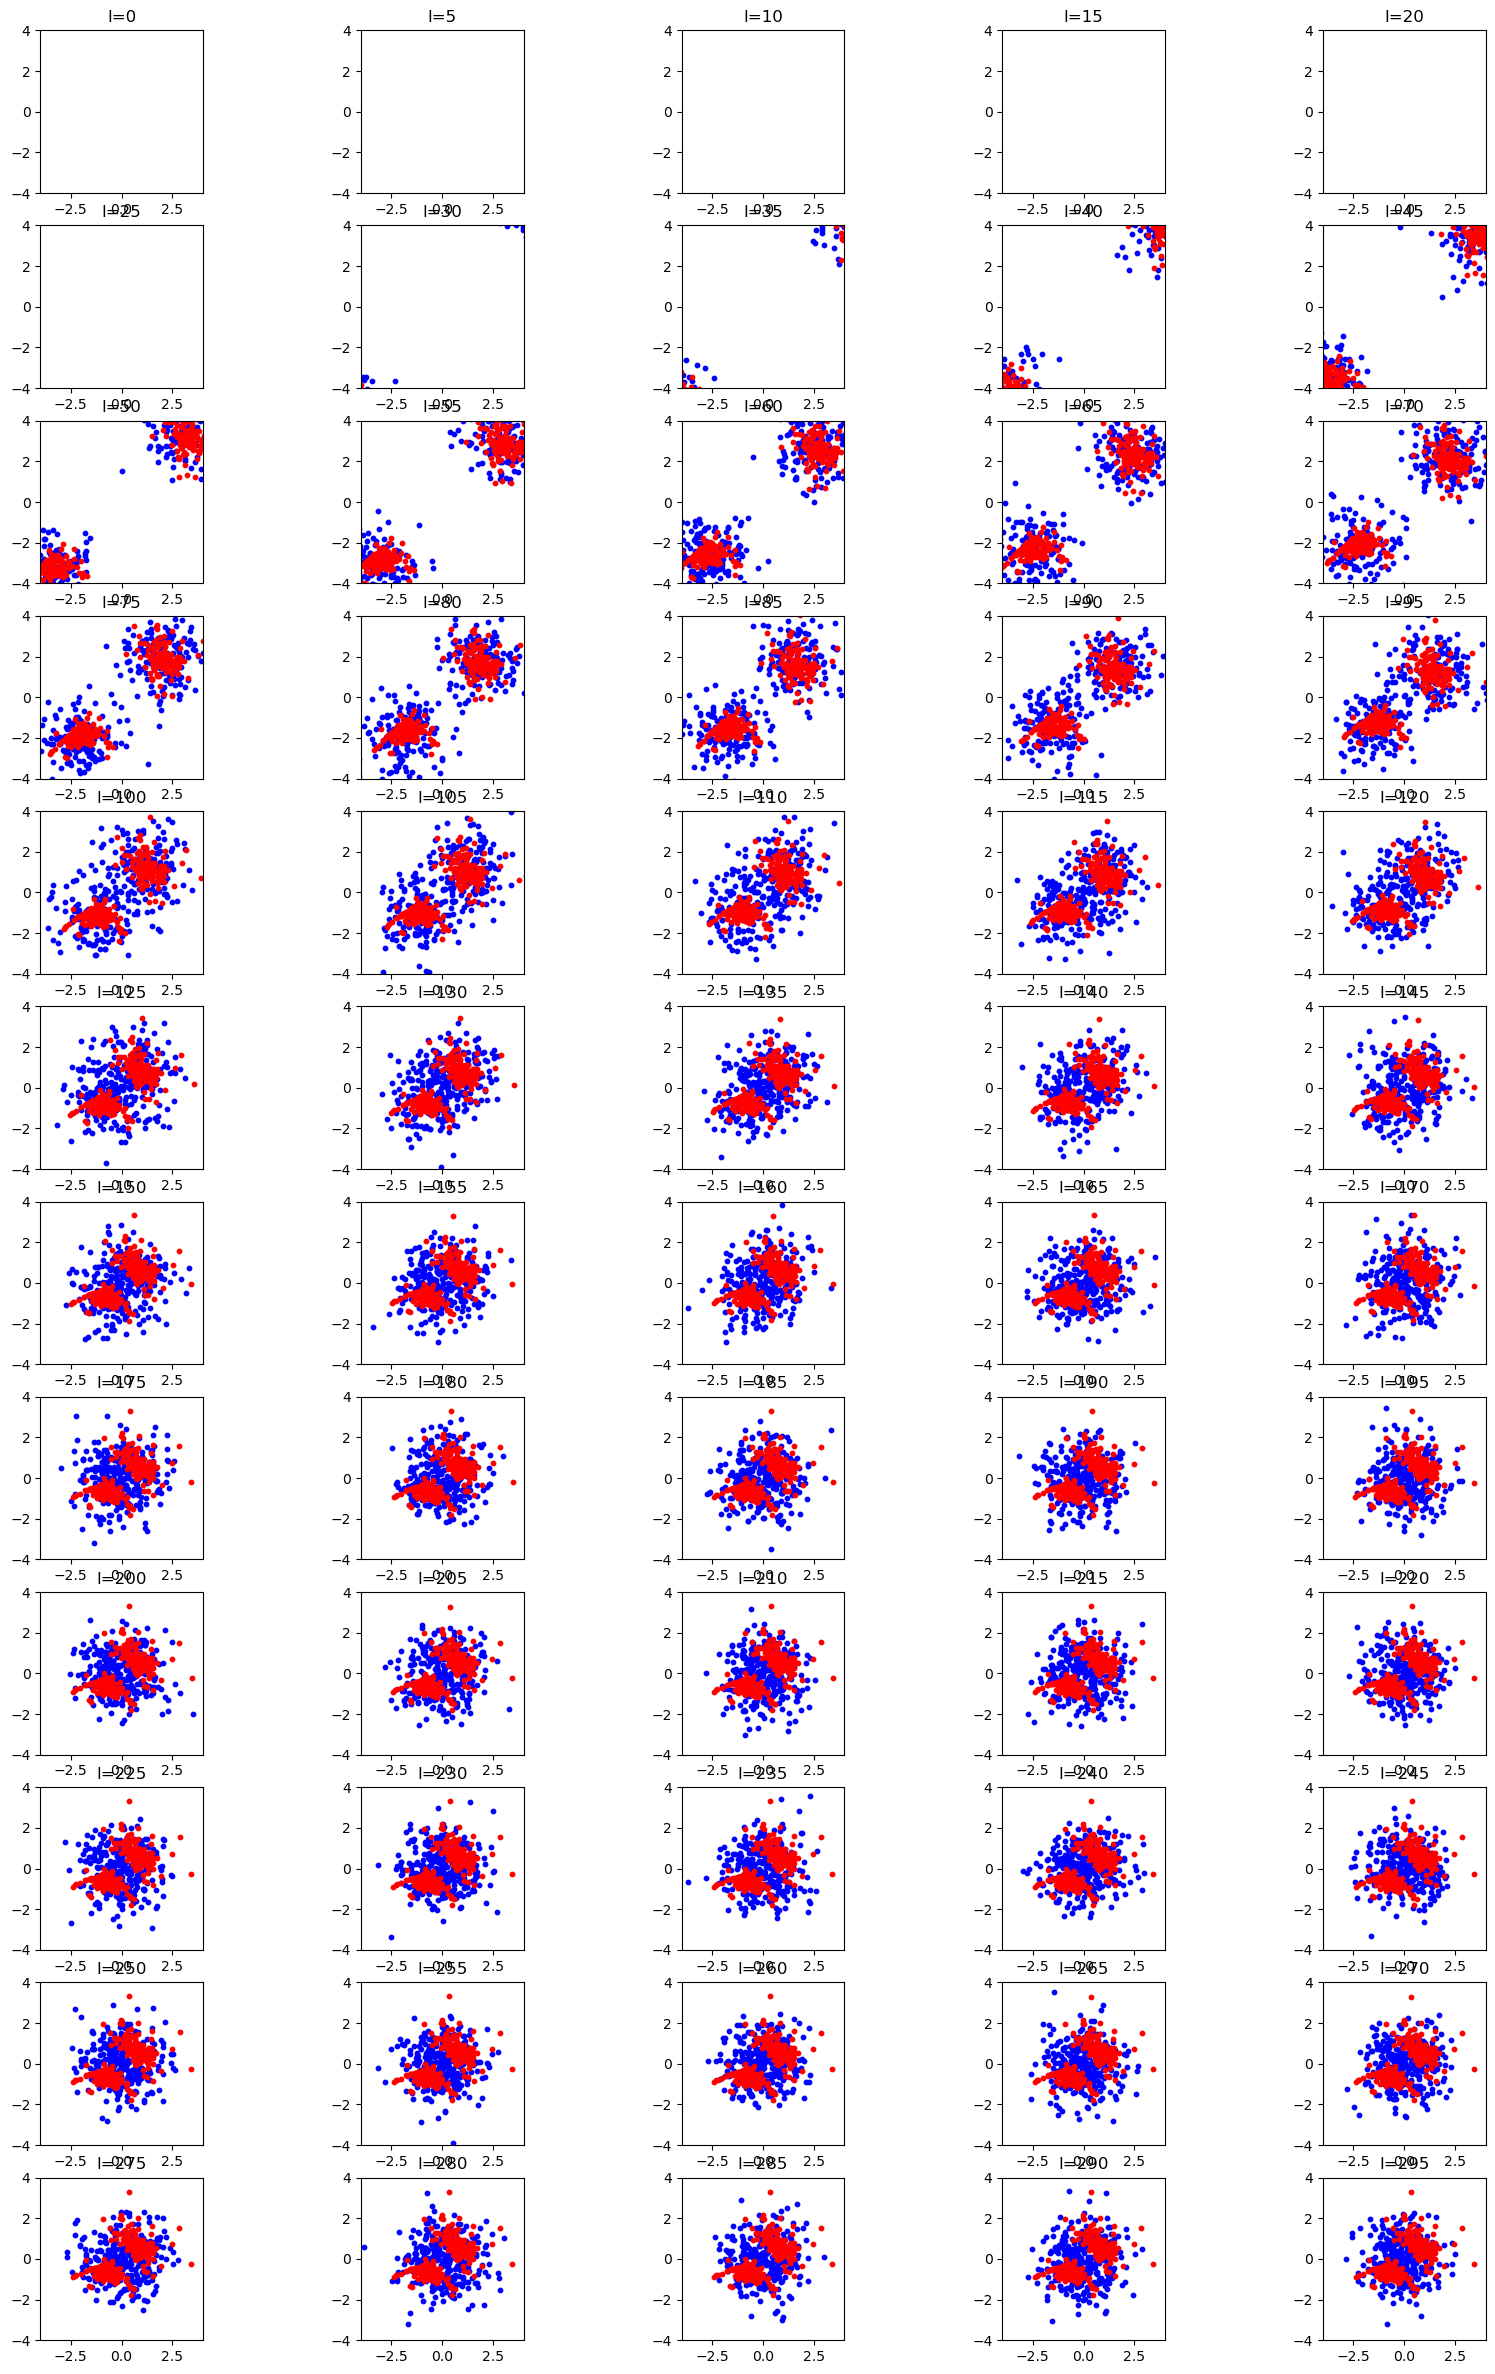

In [ ]:
import functions as fc
import importlib
importlib.reload(fc)


N_iter = 300
t1 = 0.1
tau = 0.02
lambd = 1e-3
X = X1 
Z = X1
Y = X1
L1 = []
L2 = []
fig, axs = plt.subplots(nrows=2*N_iter//50, ncols=5, figsize=(20, N_iter//10))
norm_V_H = []
norm_V_2 = []
Phi = []
ZZ = []
T = []


xlim = (-4, 4)
ylim = (-4, 4)

for l in range(N_iter):
    t = l * tau + t1
     
    if l%5 == 0:
        print('iter'+str(l))
        ll = l//5
        ax = axs[ll//5, ll%5]
        #ax.scatter(Y[:, 0], Y[:, 1],color = "lightblue",s=10)
        ax.scatter(Z[:, 0], Z[:, 1],color = "blue", label = "OU dynamics",s=10) 
        ax.scatter(X[:, 0], X[:, 1],color = "red", label = r"$X_{t+\tau} = X_{t} + \tau v_t(X_{t})$",s=10)
        #ax.scatter(X[mask_inv][:, 0], X[mask_inv][:, 1],color = "red", label = r"$X_{t+\tau} = X_{t} + \tau v_t(X_{t})$",s=10)
        ax.set_title(f'l={l}')
        ax.set_aspect('equal')
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
    #     ax.legend()

    # if l == 50:
    #     sigma = 2 #sigma/1.1#np.sqrt(np.mean(np.linalg.norm(X[:,None,:]-X[None,:,:],axis=2)**2))
    #     #print(sigma)
    #     k = lambda x,y : fc.k_gauss(x,y,sigma)
    #     dk = lambda x,y : fc.dk_gauss(x,y,sigma)
    #     ddk = lambda x,y : fc.ddk_gauss(x,y,sigma)

    # if l == 100:
    #     sigma = 1.5 #sigma/1.1#np.sqrt(np.mean(np.linalg.norm(X[:,None,:]-X[None,:,:],axis=2)**2))
    #     #print(sigma)
    #     k = lambda x,y : fc.k_gauss(x,y,sigma)
    #     dk = lambda x,y : fc.dk_gauss(x,y,sigma)
    #     ddk = lambda x,y : fc.ddk_gauss(x,y,sigma)
    
    

    eps = np.random.randn(n, d)
    psi = fc.psi(X1, eps, t)
    sigma_t = np.sqrt(fc.sigma_2(t))

    Z = np.exp(-t) * X1 + sigma_t * eps #Ornstein-Uhlenbeck dynamics     
    Xi = fc.Xi(Z, eps, k, dk, ddk, t)
    phi = np.linalg.inv(1/n * Xi + lambd * np.identity(n)) @ psi
    Phi.append(phi)
    T.append(t)
    ZZ.append(Z)
    score = -1 * eps / sigma_t
    M.append(lambda x : k(x,Z)[:,:,None] * score[None,:,:] + np.transpose(dk(Z,x), (1,0,2)))
    v =  lambda x : 1/n * np.sum(phi[None, :, None] * M[l](x), axis=1)

    norm_V_H.append(np.sqrt(1/n**2 * phi.T @ Xi @ phi))
    norm_V_2.append(np.linalg.norm(v(X)[0]))
    print(np.sqrt(1/n**2 * phi.T @ Xi @ phi))
    print(np.linalg.norm(v(X)[0]))
    print()

    # L1.append(fc.Loss1(v,Z,Mu[0],phi,Xi,t,k,dk,sigma,lambd))
    L2.append(fc.Loss2(v,Z,eps,Mu[0],phi,Xi,psi,t,k,dk,sigma,lambd))

    if l == 0:
        X = X + t1 * v(X) #ou tau + t1 ? 
    else:
        X = X + tau * v(X)
    Y = Z + tau * v(Z)


 

In [16]:
def V(phi,Z,t,Y):
    M = k(Y,Z)[:,:,None] * score[None,:,:] + np.transpose(dk(Z,Y), (1,0,2))
    v = 1/n * np.sum(phi[None, :, None] * M, axis=1)
    return v


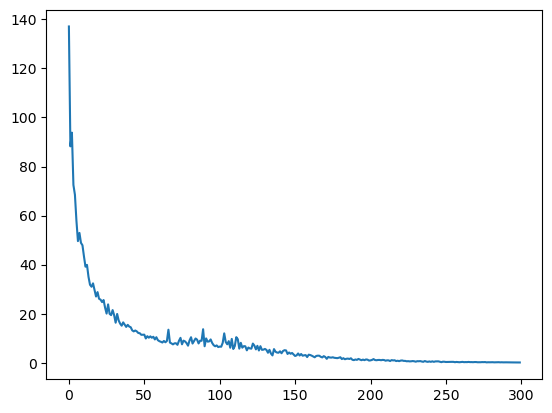

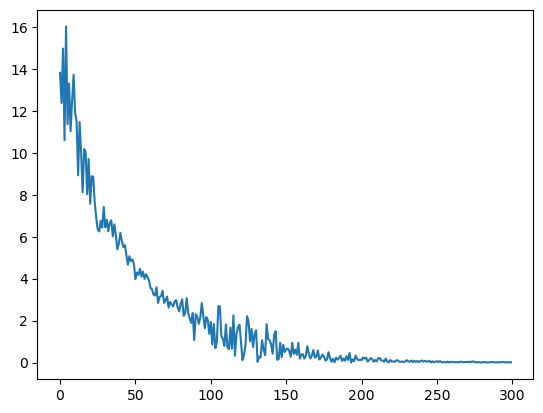

In [18]:
plt.plot(norm_V_H)
plt.figure()
plt.plot(norm_V_2)


In [19]:
# # plt.figure()    
# # #plt.plot(L1[1:]) # eq 3
# # #plt.figure()
# plt.plot(L2[100:]) # eq 5
# plt.show()



In the next cell, we start form a set of particules $Y_j \sim \gamma^d$ and inverse OU process with the objective to recover a sample for $\pi_1$. I doesn't work yet. 

In [22]:
# print(V)
# x = np.array([np.array([0.0,0.0])])
# print(V[0](x))
# print(V[0])

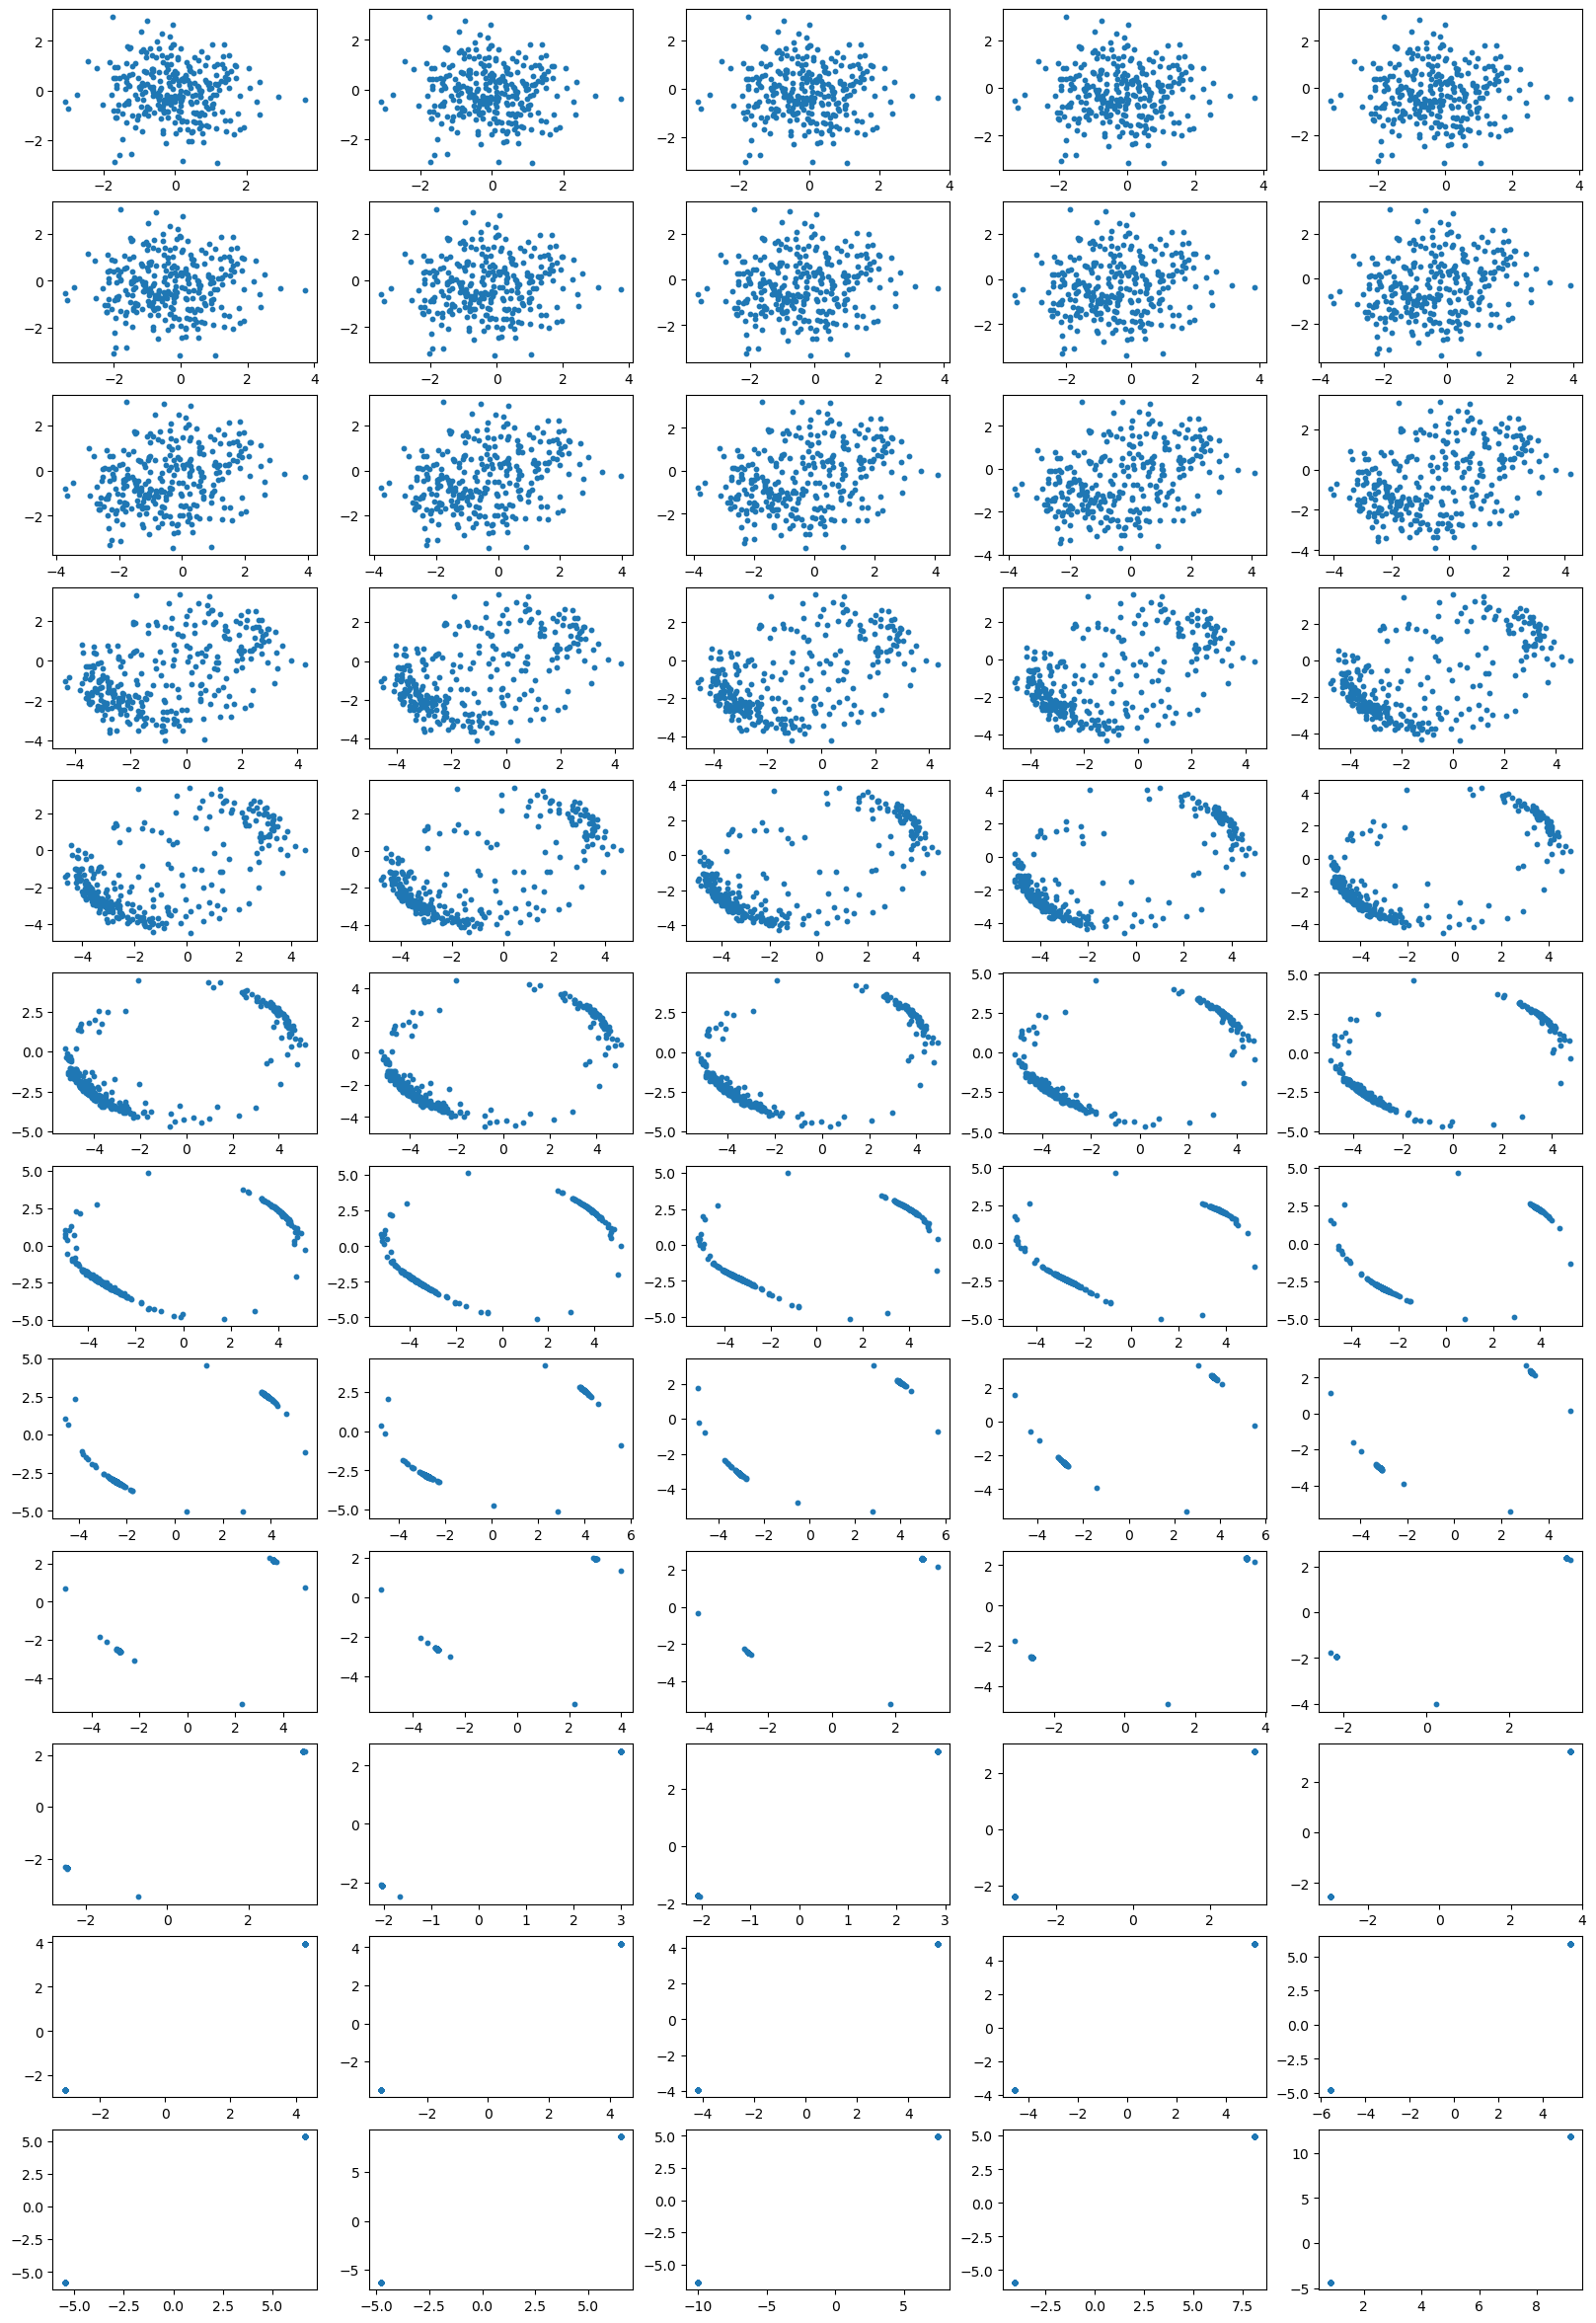

In [21]:
m = 300
Y =  scs.multivariate_normal.rvs(np.zeros(d),np.identity(d),m)

fig, axs = plt.subplots(nrows=2*N_iter//50, ncols=5, figsize=(20, N_iter//10))

for i in range(N_iter):
    # for k in range(m):
    #     print(Y[k])
    #     print(V[N_iter-1-i](np.array([Y[k]])))
    #     Y[k] = Y[k] - tau * V[N_iter-1-i](np.array([Y[k]]))[0]

    Y = Y - tau * V(Phi[N_iter-1-i], ZZ[N_iter-1-i], T[N_iter-1-i], Y)
    #print(np.linalg.norm(V[N_iter-1-i](Y)[0]))
    if i % 5 == 0:
        j = i//5
        ax = axs[j//5, j%5]
        ax.scatter(Y[:,0], Y[:,1], s=10)
    #print(Y[0])


#plt.scatter(Y[:,0], Y[:,1])
#plt.show()


In [ ]:
(m,d) [Y[k]]